### 🩺 Stroke Prediction - Felç Tahmini 🔬

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [66]:
orj_data = pd.read_csv("health_data.csv")

In [3]:
orj_data.shape

(70692, 18)

In [4]:
# Veri setindeki değişken ve gözlem sayısı

print("Gözlem sayısı : " ,len(orj_data))
print("Değişken sayısı : ", len(orj_data.columns))

Gözlem sayısı :  70692
Değişken sayısı :  18


In [5]:
orj_data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
orj_data.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Diabetes                float64
Hypertension            float64
Stroke                  float64
dtype: object

In [7]:
orj_data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

In [67]:
def grab_col_names(dataframe, cat_th = 20, car_th = 20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    return cat_cols, num_cols, cat_but_car


grab_col_names(orj_data)

Observations: 70692
Variables: 18
cat_cols: 15
num_cols: 3
cat_but_car: 0


(['Age',
  'Sex',
  'HighChol',
  'CholCheck',
  'Smoker',
  'HeartDiseaseorAttack',
  'PhysActivity',
  'Fruits',
  'Veggies',
  'HvyAlcoholConsump',
  'GenHlth',
  'DiffWalk',
  'Diabetes',
  'Hypertension',
  'Stroke'],
 ['BMI', 'MentHlth', 'PhysHlth'],
 [])

**Değişkenlerin Tanıtılması**

* Kategorik Değişkenler

    * 'Age': Yaş. 1 = 18-24, 9 = 60-64, 13 = 80 ve üstü
    * 'Sex': Cinsiyet. 0 = kadın, 1 = erkek
    * 'HighChol': Yüksek kolesterol. 0 = yok, 1 = var
    * 'CholCheck': Son beş yıl içinde kolesterol kontrolü. 0 = yapılmamış, 1 = yapılmış
    * 'Smoker': Hayatınız boyunca en az 100 sigara (5 paket) içtiniz mi? 0 = hayır, 1 = evet
    * 'HeartDiseaseorAttack': Koroner kalp hastalığı veya miyokard enfarktüsü? 0 = hayır, 1 = evet
    * 'PhysActivity': Son 30 gün içinde normal işleriniz dışında fiziksel aktivite veya egzersiz yaptınız mı? 0 = hayır, 1 = evet
    * 'Fruits': Günde bir veya daha fazla meyve tüketimi. 0 = hayır, 1 = evet
    * 'Veggies': Günde bir veya daha fazla sebze tüketimi. 0 = hayır, 1 = evet
    * 'HvyAlcoholConsump': Ağır içiciler. (Yetişkin erkekler için haftada 14'ten fazla, yetişkin kadınlar için ise haftada 7'den fazla içki tüketimi.) 0 = hayır, 1 = evet
    * 'GenHlth': 1-5 aralığında sağlık durumunuz? 1 = harika, 2 = çok iyi, 3 = iyi, 4 = makul, 5 = kötü
    * 'DiffWalk': Yürürken veya merdiven çıkarken ciddi zorluk çekiyor musunuz? 0 = hayır, 1 = evet
    * 'Diabetes': Diyabet. 0 = hayır, 1 = evet
    * 'Hypertension': Hipertansiyon. 0 = hayır, 1 = evet
    * 'Stroke': Felç. 0 = hayır, 1 = evet

* Sayısal Değişkenler

    * 'BMI': Vücut Kitle İndeksi.
    * 'MentHlth': Son 30 gün içinde kaç gün boyunca ruh sağlığınız iyi değildi?
    * 'PhysHlth': Son 30 gün içinde kaç gün boyunca fiziksel sağlığınız iyi değildi?

In [8]:
orj_data.rename(columns = {'Age':               'Yas',
                        'Sex':                  'Cinsiyet',
                        'HighChol':             'YuksekKolesterol',
                        'CholCheck':            'KolesterolKontrol',
                        'BMI':                  'VucutKitleIndeksi',
                        'Smoker':               'SigaraTuketimi',
                        'HeartDiseaseorAttack': 'KalpRahatsizligi',
                        'PhysActivity':         'FizikselAktivite',
                        'Fruits':               'MeyveTuketimi',
                        'Veggies':              'SebzeTuketimi',
                        'HvyAlcoholConsump':    'AgirIcici',
                        'GenHlth':              'SaglikDurumu',
                        'MentHlth':             'RuhSagligi',
                        'PhysHlth':             'FizikselSaglik',
                        'DiffWalk':             'YurumedeZorluk',
                        'Diabetes':             'Diyabet',
                        'Hypertension':         'Hipertansiyon',
                        'Stroke':               'Felc'
                        }, inplace = True)
                                
orj_data.head(3)

,Yas,Cinsiyet,YuksekKolesterol,KolesterolKontrol,VucutKitleIndeksi,SigaraTuketimi,KalpRahatsizligi,FizikselAktivite,MeyveTuketimi,SebzeTuketimi,AgirIcici,SaglikDurumu,RuhSagligi,FizikselSaglik,YurumedeZorluk,Diyabet,Hipertansiyon,Felc
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0


In [10]:
orj_data.eq(0).sum()

Yas                      0
Cinsiyet             38386
YuksekKolesterol     33529
KolesterolKontrol     1749
VucutKitleIndeksi        0
SigaraTuketimi       37094
KalpRahatsizligi     60243
FizikselAktivite     20993
MeyveTuketimi        27443
SebzeTuketimi        14932
AgirIcici            67672
SaglikDurumu             0
RuhSagligi           48091
FizikselSaglik       39915
YurumedeZorluk       52826
Diyabet              35346
Hipertansiyon        30860
Felc                 66297
dtype: int64

In [13]:
#Eşsiz - unique değerler

for i in list(orj_data.columns):
    print("{} ---------- {}".format(i, orj_data[i].value_counts().shape[0]))

Yas ---------- 13
Cinsiyet ---------- 2
YuksekKolesterol ---------- 2
KolesterolKontrol ---------- 2
VucutKitleIndeksi ---------- 80
SigaraTuketimi ---------- 2
KalpRahatsizligi ---------- 2
FizikselAktivite ---------- 2
MeyveTuketimi ---------- 2
SebzeTuketimi ---------- 2
AgirIcici ---------- 2
SaglikDurumu ---------- 5
RuhSagligi ---------- 31
FizikselSaglik ---------- 31
YurumedeZorluk ---------- 2
Diyabet ---------- 2
Hipertansiyon ---------- 2
Felc ---------- 2


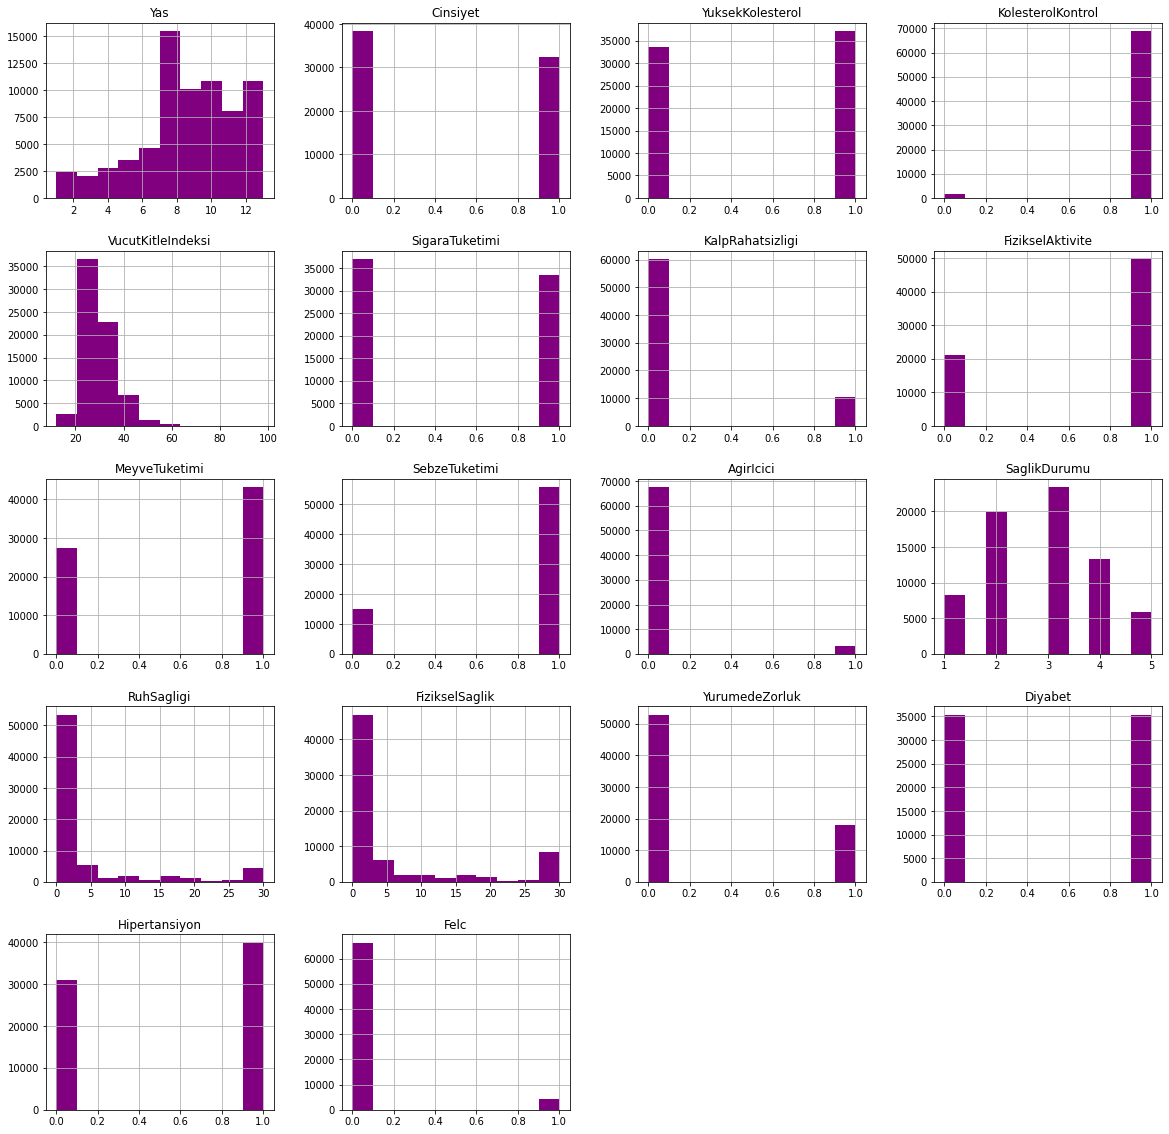

In [14]:
orj_data.hist(figsize = (20,20), color='purple')
plt.show()

In [15]:
kopya_data = orj_data.copy()
kopya_data.head(3)

,Yas,Cinsiyet,YuksekKolesterol,KolesterolKontrol,VucutKitleIndeksi,SigaraTuketimi,KalpRahatsizligi,FizikselAktivite,MeyveTuketimi,SebzeTuketimi,AgirIcici,SaglikDurumu,RuhSagligi,FizikselSaglik,YurumedeZorluk,Diyabet,Hipertansiyon,Felc
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0


In [16]:
#Kategorik verilerin etiketlenmesi

kopya_data.Yas[kopya_data['Yas'] == 1] = '18 - 24 yaş'
kopya_data.Yas[kopya_data['Yas'] == 2] = '25 - 29 yaş'
kopya_data.Yas[kopya_data['Yas'] == 3] = '30 - 34 yaş'
kopya_data.Yas[kopya_data['Yas'] == 4] = '35 - 39 yaş'
kopya_data.Yas[kopya_data['Yas'] == 5] = '40 - 44 yaş'
kopya_data.Yas[kopya_data['Yas'] == 6] = '45 - 49 yaş'
kopya_data.Yas[kopya_data['Yas'] == 7] = '50 - 54 yaş'
kopya_data.Yas[kopya_data['Yas'] == 8] = '55 - 59 yaş'
kopya_data.Yas[kopya_data['Yas'] == 9] = '60 - 64 yaş'
kopya_data.Yas[kopya_data['Yas'] == 10] = '65 - 69 yaş'
kopya_data.Yas[kopya_data['Yas'] == 11] = '70 - 74 yaş'
kopya_data.Yas[kopya_data['Yas'] == 12] = '75 - 79 yaş'
kopya_data.Yas[kopya_data['Yas'] == 13] = '80 ve üzeri yaş'

kopya_data.Cinsiyet[kopya_data['Cinsiyet'] == 0] = 'Kadın'
kopya_data.Cinsiyet[kopya_data['Cinsiyet'] == 1] = 'Erkek'

kopya_data.YuksekKolesterol[kopya_data['YuksekKolesterol'] == 0] = 'Yok'
kopya_data.YuksekKolesterol[kopya_data['YuksekKolesterol'] == 1] = 'Var'

kopya_data.KolesterolKontrol[kopya_data['KolesterolKontrol'] == 0] = 'Yapılmamış'
kopya_data.KolesterolKontrol[kopya_data['KolesterolKontrol'] == 1] = 'Yapılmış'

kopya_data.SigaraTuketimi[kopya_data['SigaraTuketimi'] == 0] = 'Hayır'
kopya_data.SigaraTuketimi[kopya_data['SigaraTuketimi'] == 1] = 'Evet'

kopya_data.KalpRahatsizligi[kopya_data['KalpRahatsizligi'] == 0] = 'Var'
kopya_data.KalpRahatsizligi[kopya_data['KalpRahatsizligi'] == 1] = 'Yok'

kopya_data.FizikselAktivite[kopya_data['FizikselAktivite'] == 0] = 'Yapılmamış'
kopya_data.FizikselAktivite[kopya_data['FizikselAktivite'] == 1] = 'Yapılmış'

kopya_data.MeyveTuketimi[kopya_data['MeyveTuketimi'] == 0] = 'Hayır'
kopya_data.MeyveTuketimi[kopya_data['MeyveTuketimi'] == 1] = 'Evet'

kopya_data.SebzeTuketimi[kopya_data['SebzeTuketimi'] == 0] = 'Hayır'
kopya_data.SebzeTuketimi[kopya_data['SebzeTuketimi'] == 1] = 'Evet'

kopya_data.AgirIcici[kopya_data['AgirIcici'] == 0] = 'Hayır'
kopya_data.AgirIcici[kopya_data['AgirIcici'] == 1] = 'Evet'

kopya_data.SaglikDurumu[kopya_data['SaglikDurumu'] == 1] = 'Harika'
kopya_data.SaglikDurumu[kopya_data['SaglikDurumu'] == 2] = 'Çok İyi'
kopya_data.SaglikDurumu[kopya_data['SaglikDurumu'] == 3] = 'İyi'
kopya_data.SaglikDurumu[kopya_data['SaglikDurumu'] == 4] = 'Makul'
kopya_data.SaglikDurumu[kopya_data['SaglikDurumu'] == 5] = 'Kötü'

kopya_data.YurumedeZorluk[kopya_data['YurumedeZorluk'] == 0] = 'Hayır'
kopya_data.YurumedeZorluk[kopya_data['YurumedeZorluk'] == 1] = 'Evet'

kopya_data.Diyabet[kopya_data['Diyabet'] == 0] = 'Hayır'
kopya_data.Diyabet[kopya_data['Diyabet'] == 1] = 'Evet'

kopya_data.Hipertansiyon[kopya_data['Hipertansiyon'] == 0] = 'Hayır'
kopya_data.Hipertansiyon[kopya_data['Hipertansiyon'] == 1] = 'Evet'

kopya_data.Felc[kopya_data['Felc'] == 0] = 'Hayır'
kopya_data.Felc[kopya_data['Felc'] == 1] = 'Evet'

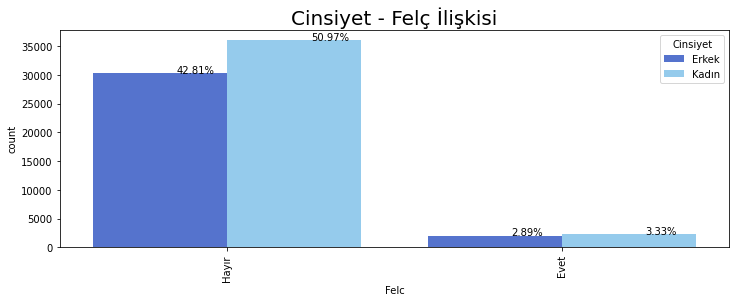

In [17]:
cols = ["royalblue", "lightskyblue"]

plt.figure(figsize=(12,4))
x = sns.countplot(x = 'Felc', data = kopya_data, hue = 'Cinsiyet', palette = cols)
plt.xticks(rotation = 90)
plt.title('Cinsiyet - Felç İlişkisi', fontdict = {'fontsize':20})

for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height() / kopya_data.shape[0]) * 100) + '%', (i.get_x() + 0.25, i.get_height() + 0.01))
plt.show()

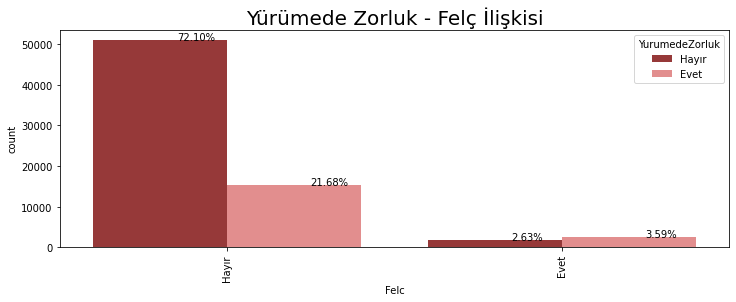

In [18]:
cols = ["brown", "lightcoral"]

plt.figure(figsize=(12,4))
x = sns.countplot(x = 'Felc', data = kopya_data, hue = 'YurumedeZorluk', palette = cols)
plt.xticks(rotation = 90)
plt.title('Yürümede Zorluk - Felç İlişkisi', fontdict = {'fontsize':20})

for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height() / kopya_data.shape[0]) * 100) + '%', (i.get_x() + 0.25, i.get_height() + 0.01))
plt.show()

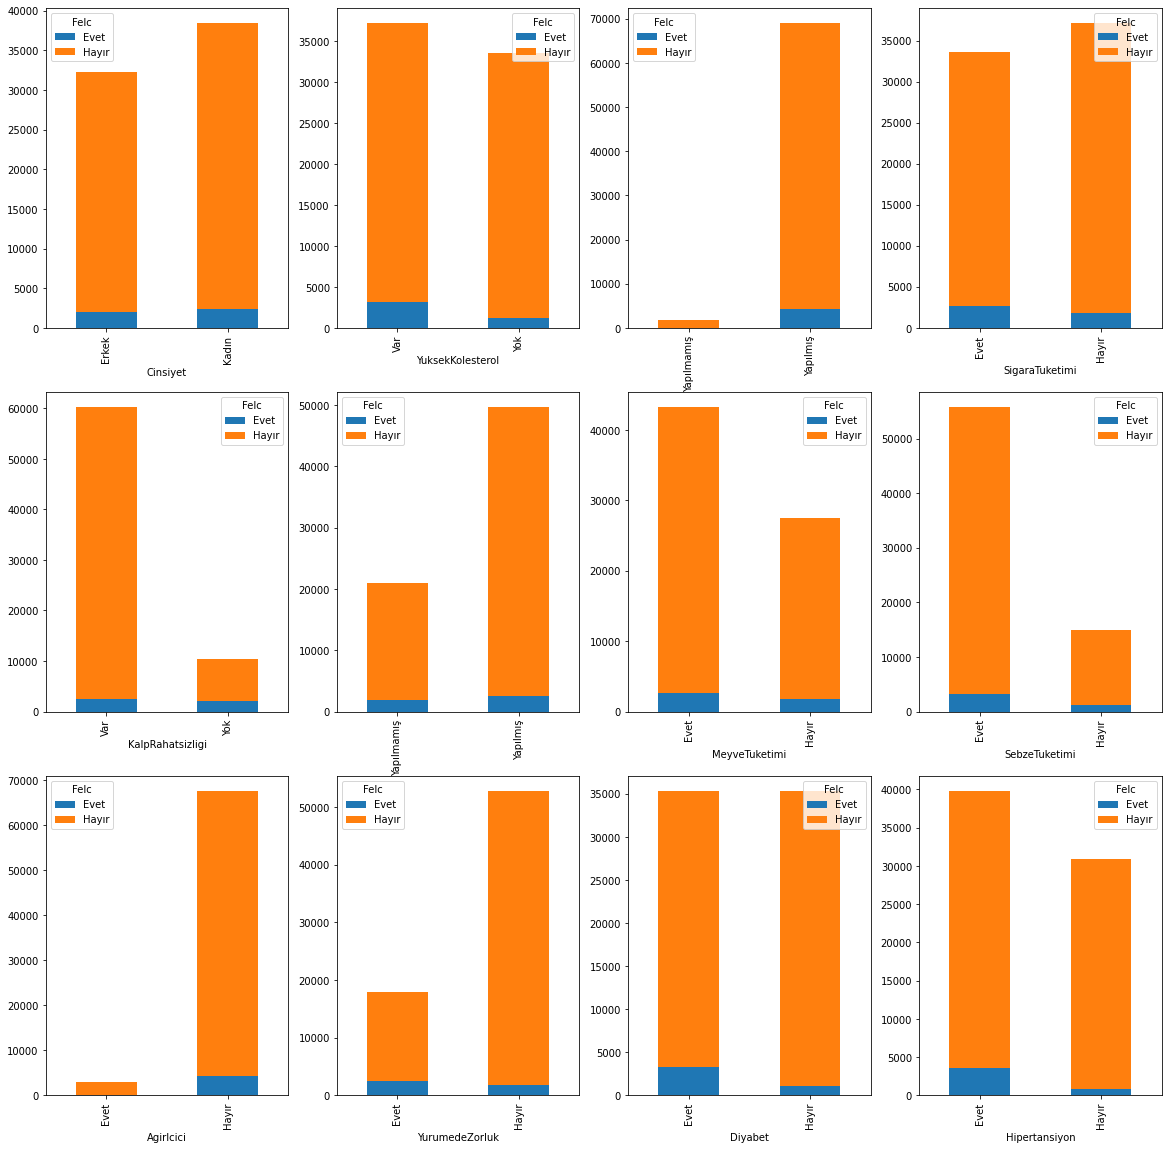

In [19]:
#Binary kategorik değişkenlerin target değişkenle ilişkisi

binary_cols = ['Cinsiyet', 'YuksekKolesterol', 'KolesterolKontrol', 'SigaraTuketimi', 'KalpRahatsizligi', 'FizikselAktivite', 'MeyveTuketimi', 'SebzeTuketimi', 'AgirIcici',
              'YurumedeZorluk', 'Diyabet', 'Hipertansiyon']

def create_plot_pivot(kopya_data, x_column):
  _df_plot = kopya_data.groupby([x_column, 'Felc']).size() \
  .reset_index().pivot(columns = 'Felc', index = x_column, values = 0)
  return _df_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(binary_cols)

for i in range(c):
    create_plot_pivot(kopya_data, binary_cols[i]).plot(kind = 'bar', stacked = True, ax = axe[i])
    axe[i].set_xlabel(binary_cols[i])
    
fig.show()

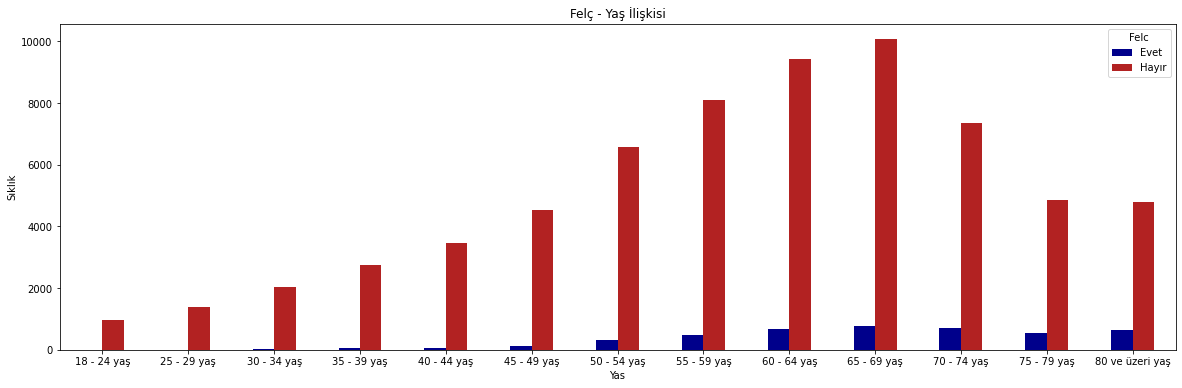

In [20]:
colors = ['darkblue', 'firebrick']

pd.crosstab(kopya_data.Yas, kopya_data.Felc).plot(kind = "bar", figsize = (20,6), color = colors)
plt.title('Felç - Yaş İlişkisi')
plt.xlabel('Yas')
plt.xticks(rotation = 0)
plt.ylabel('Sıklık')
plt.show()

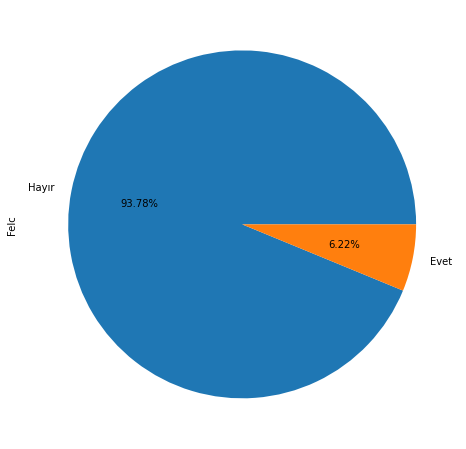

In [21]:
#Hedef değişkenimiz: Stroke - Felc

kopya_data['Felc'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(8, 8));

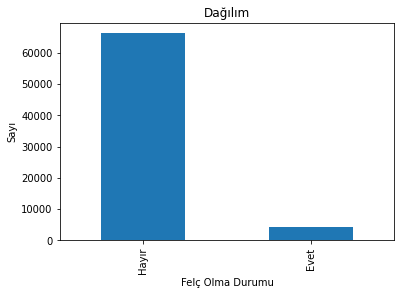

In [22]:
kopya_data['Felc'].value_counts()
kopya_data['Felc'].value_counts().plot(kind = 'bar', title = 'Dağılım', xlabel = 'Felç Olma Durumu', ylabel = "Sayı");

### Feature Selection

In [23]:
#Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [25]:
orj_data.corr()

,Yas,Cinsiyet,YuksekKolesterol,KolesterolKontrol,VucutKitleIndeksi,SigaraTuketimi,KalpRahatsizligi,FizikselAktivite,MeyveTuketimi,SebzeTuketimi,AgirIcici,SaglikDurumu,RuhSagligi,FizikselSaglik,YurumedeZorluk,Diyabet,Hipertansiyon,Felc
Yas,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.278738,0.338132,0.123879
Cinsiyet,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.044413,0.040819,0.003822
YuksekKolesterol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.289213,0.316515,0.099786
KolesterolKontrol,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.115382,0.103283,0.022529
VucutKitleIndeksi,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.293373,0.241019,0.022931
SigaraTuketimi,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.085999,0.087438,0.064658
KalpRahatsizligi,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.211523,0.210750,0.223394
FizikselAktivite,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.158666,-0.136102,-0.079985
MeyveTuketimi,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.054077,-0.040852,-0.008996
SebzeTuketimi,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.079293,-0.066624,-0.047601


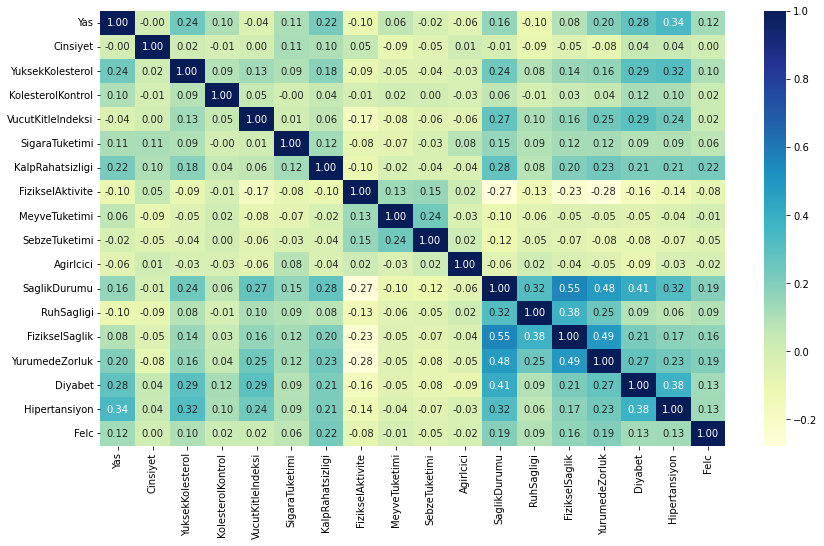

In [26]:
corr_matrix = orj_data.corr()

fig, ax = plt.subplots(figsize = (14,8))
ax = sns.heatmap(corr_matrix,
                annot = True,
                fmt = ".2f",
                cmap = 'YlGnBu')

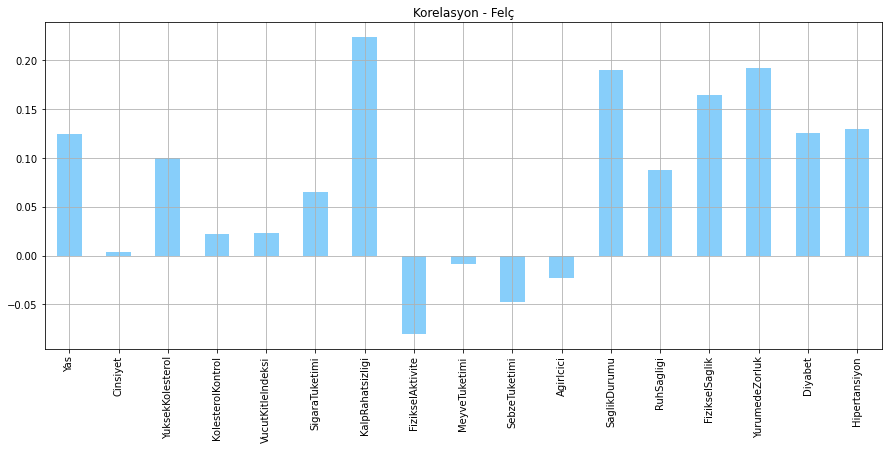

In [27]:
orj_data.drop('Felc', axis = 1).corrwith(orj_data.Felc).plot(kind = 'bar', grid = True, figsize = (15, 6), title = "Korelasyon - Felç", color = "lightskyblue");

In [28]:
X = orj_data.iloc[:, 0:17]
y = orj_data.iloc[:, -1]

In [29]:
#Ki-Kare Testi

BestFeatures = SelectKBest(score_func = chi2, k = 10)
fit = BestFeatures.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

f_Scores = pd.concat([df_columns, df_scores], axis = 1)   #feature scores
f_Scores.columns = ['Feature', 'Score']

f_Scores.sort_values('Score', ascending = False)

,Feature,Score
13,FizikselSaglik,33328.462710
12,RuhSagligi,9551.561622
6,KalpRahatsizligi,3006.413870
14,YurumedeZorluk,1952.775695
11,SaglikDurumu,1108.913871
0,Yas,1028.052057
15,Diyabet,556.058971
16,Hipertansiyon,514.018067
2,YuksekKolesterol,333.857774
5,SigaraTuketimi,155.079193


* Ki - Kare Testi ve Korelasyon sonuçları göz önüne alındığında hedef değişken "Felc" ile en az ilişkili olduğunu gördüğüm 4 değişkeni attım. Bunlar: Cinsiyet, KolesterolKontrol, MeyveTuketimi ve SebzeTuketimi.

In [30]:
#Cinsiyet, KolesterolKontrol, MeyveTuketimi, SebzeTuketimi attım

colomns = ["Cinsiyet", "KolesterolKontrol", "MeyveTuketimi", "SebzeTuketimi"]
guncel_data = orj_data.copy()
guncel_data.drop(colomns, axis = 1 ,inplace = True)
guncel_data.head(3)

,Yas,YuksekKolesterol,VucutKitleIndeksi,SigaraTuketimi,KalpRahatsizligi,FizikselAktivite,AgirIcici,SaglikDurumu,RuhSagligi,FizikselSaglik,YurumedeZorluk,Diyabet,Hipertansiyon,Felc
0,4.0,0.0,26.0,0.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,0.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0


### Verisetinin Imbalance Olmasının Etkileri ve Örnek Olarak Lojistik Regresyon Algoritması Üzerinde İncelenmesi

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, rcParams
import itertools

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score,recall_score, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix


from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [32]:
X = guncel_data.drop("Felc", axis = 1)
y = guncel_data["Felc"]

* **Veriyi Hold Out Yöntemiyle Ayırmak**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

* **Lojistik Regresyon - Logistic Regression**

In [34]:
model = LogisticRegression(random_state=123456)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.937


Accuracy (doğruluk), sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır. Oluşturduğumuz modelin doğruluk skoru 0.937 olarak gözükmekte. Modelimiz çok iyi çalışıyor diyebilir miyiz?

Performansını incelemek için birde Confusion Matrix üzerinden bakalım.

* Confusion Matrix

Confusion Matrix, makine öğrenmesinde kullanılan sınıflandırma modellerinin performansını değerlendirmek için hedef niteliğe ait tahminlerin ve gerçek değerlerin karşılaştırıldığı bir tablodur.

Tahmini ve gerçek değerlerin 4 farklı kombinasyonunu içermektedir:

        * Doğru pozitif (True Positive – TP) – Pozitif tahmin ettiniz ve bu doğru.
        * Doğru negatif (True Negative – TN) – Olumsuz tahmin ettiniz ve bu doğru.
        * Yanlış pozitif (False Positive – FP) – Pozitif tahmin ettiniz ve bu yanlış.
        * Yanlış negatif (False Negative – FN) – Olumsuz tahmin ettiniz ve bu yanlış.

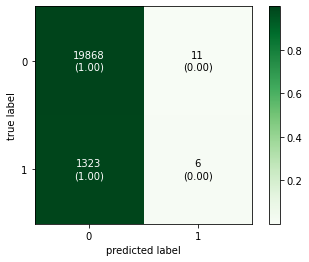

In [35]:
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm1, show_absolute = True, show_normed = True, colorbar = True, cmap = plt.cm.Greens)
plt.show()

        * "Felc - 0" yani "Felç Olmayan" sınıf için 19868 (TP) doğru, 11 (FP) yanlış olmak üzere toplam 19879 tahmin yapılmış.

        * "Felc - 1" yani "Felç Olan" sınıf için ise 1323 (FN) yanlış, 6 (TN) doğru olmak üzere toplam 1329 tahmin yapılmış.

Accuracy ile "Felç Olma" durumunu 0.937 doğrulukla tahmin edebildiğini görmüştük. Ama Confusion Matrix'i incelediğimizde, "Felc - 1" yani "Felç Olan" sınıf için yanlış tahminlerin oranının oldukça yüksek olduğuyla karşılaşıyoruz. Çoğunluk sınıfını tahmin etmekte başarılı iken, azınlık sınıfını tahmin etmede başarılı değildir. Yani aslında model 0.937 oranla "Felc - 0" yani "Felç Olmayan" sınıfı doğru tahmin ediyor.

"Felc - 0" yani "Felç Olmayan" sınıfa ait gözlem sayısının diğer sınıfa ait gözlem sayısından fazla olmasının, modelin "Felç Olmayan" sınıfı tahminlemede başarılı olmasına neden olduğu sonucuna ulaşabiliriz.

Yaptığımız bu gözlem ile, sınıflandırma algoritmalarında başarı kriteri olarak sadece accuracy (doğruluk) değerine bakmanın büyük bir yanılgıya sebep olduğunu söyleyebiliriz. Özellikle dengesiz veri setlerinde (imbalanced data sets) accuracy oranı bize doğru bilgi vermez.

* Doğru Metrik Seçimi

    Accuracy (doğruluk) değerinin tek başına yeterli olmadığını gördük. Performansı ölçmek için farklı metriklere bakmamız gerekiyor.
    * **Precision (Kesinlik)**: Pozitif olarak tahmin edilenlerin ne kadarının gerçekte pozitif olduğunu gösterir. Eğer precision düşük ise çok sayıda hatalı pozitif olduğunu ifade eder.
    * **Recall (Duyarlılık):** Pozitif olarak tahmin etmemiz gereken değerlerin ne kadarını pozitif tahmin ettiğimizi gösterir. Eğer recall düşük ise çok sayıda yanlış negatif olduğunu ifade eder. Mümkün olduğu kadar yüksek olmalıdır.
    * **F1 score:** Düşük precison ve yüksek recall veya tam tersi durumda iki modeli karşılaştırmak güçtür. Karşılaştırılabilir bir hale getirmek, F1 score'u precision ve recall'u aynı anda ölçülmesine yardımcı olur. Precision ve Duyarlılık değerlerinin harmonik ortalamasını göstermektedir.

Şimdi de **sınıflandırma raporu**nu ve bahsettiğimiz metriklere ait değerleri inceleyelim:

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19879
         1.0       0.35      0.00      0.01      1329

    accuracy                           0.94     21208
   macro avg       0.65      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208



Metrik değerlerine baktığımızda, modelin felç olanları tahmin etmede başarısız olduğunu görüyoruz. Support değerlerine bakıldığında, sınıflar arasındaki gözlem sayıları arasındaki dengesizliğin ölçümleri etkilediğini söyleyebiliriz.

* ROC Curve (Receiver Operating Characteristic Curve - Alıcı İşletim Karakteristik Eğrisi)

    Sınıflandırma modellerinin başarı hesaplarında ROC Curve sık sık karşımıza çıkmaktadır. Temelde iki metriğe bakmaktadır: **True Positive Rate** (Recall) ve **False Positive Rate**

    Bu iki metrik x ve y eksenlerine yerleştirerek çizginin altında kalan alan hesaplanır: **AUC — Area Under Curve**

* AUC — Area Under Curve

    ROC eğrisini tek bir sayı ile özetler. (0,0)'dan (1,1)'e kadar ROC eğrisinin altındaki iki boyutlu alanın tamamını ölçer. En iyi değeri 1, en kötü değeri 0.5'dir.

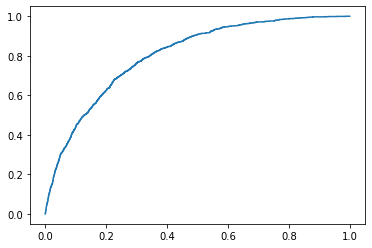

In [37]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr)
    plt.show()
    pass

generate_auc_roc_curve(model, X_test)

In [38]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Curve with Area Under the curve = %.3f"%auc)

AUC ROC Curve with Area Under the curve = 0.804


Not: ROC eğrisinin altındaki alan (AUC), genel sınıflandırma performansını değerlendirir. AUC, bir sınıfa diğerinden daha fazla önem vermediğinden, azınlık sınıfını iyi şekilde yansıtmamaktadır.

### Random Oversampling Uygulanması

In [39]:
#Random Oversampling öncesi eğitim setindeki sınıf sayısı

y_train.value_counts()

0.0    46418
1.0     3066
Name: Felc, dtype: int64

In [40]:
#Random Oversampling uygulanması (Eğitim setine uygulanıyor)

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)

In [41]:
#Random Oversampling sonrası eğitim setinin sınıf sayısı

y_randomover.value_counts()

0.0    46418
1.0    46418
Name: Felc, dtype: int64

In [42]:
#Modelin eğitilmesi ve başarı oranı

model.fit(X_randomover, y_randomover)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" %(accuracy))

Accuracy: 0.721%


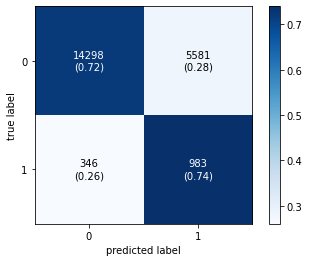

In [43]:
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm1, show_absolute = True, show_normed = True, colorbar = True, cmap = plt.cm.Blues)
plt.show()

In [44]:
#sınıflandırma raporu

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     19879
         1.0       0.15      0.74      0.25      1329

    accuracy                           0.72     21208
   macro avg       0.56      0.73      0.54     21208
weighted avg       0.92      0.72      0.79     21208



* Random Oversampling uygulandıktan sonra, eğitilen modelin doğruluk değeri 0.721'dir yani düşmüştür. 
* Confusion Matrix ve sınıflandırma raporuna bakıldığında, tahmin edilen "felç olma" sınıflarının yanlış çıkma oranı yüksek görünüyor, bu da 1 sınıfının precision değerini düşürmüş durumda. Ama aynı zamanda, 1 sınıfının recall değerinde çok iyi bir yükseliş var. Yani modelin "felç olma" sınıfını doğru tahmin etme oranı artmıştır. 
* İlk modele göre "felç olmama" sınıfının tahmin edilme başarısı düşmüş durumda ama "felç olma" sınıfının doğru tahmin edilmesindeki yükselme Random Oversampling yapıldıktan sonra oluşturulmuş modeli tercih etmemizde büyük bir etken oluşturmaktadır.

* Makine öğrenmesi algoritmaları veri setinin Random Oversampling yapıldıktan sonraki haliyle incelenecektir.

### Model

* **Karar Ağacı - Decision Tree**

In [45]:
dt = DecisionTreeClassifier(max_depth = 12, criterion = 'entropy')
dt.fit(X_randomover, y_randomover)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [46]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.720%


In [47]:
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     19879
         1.0       0.13      0.60      0.21      1329

    accuracy                           0.72     21208
   macro avg       0.55      0.66      0.52     21208
weighted avg       0.91      0.72      0.79     21208



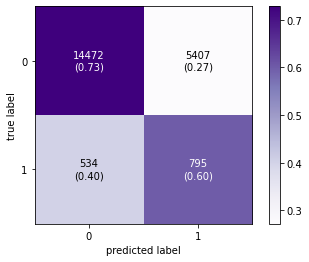

In [48]:
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm1, show_absolute = True, show_normed = True, colorbar = True, cmap = plt.cm.Purples)
plt.show()

* Derinliği 2 alarak örnek bir karar ağacı çizimi:

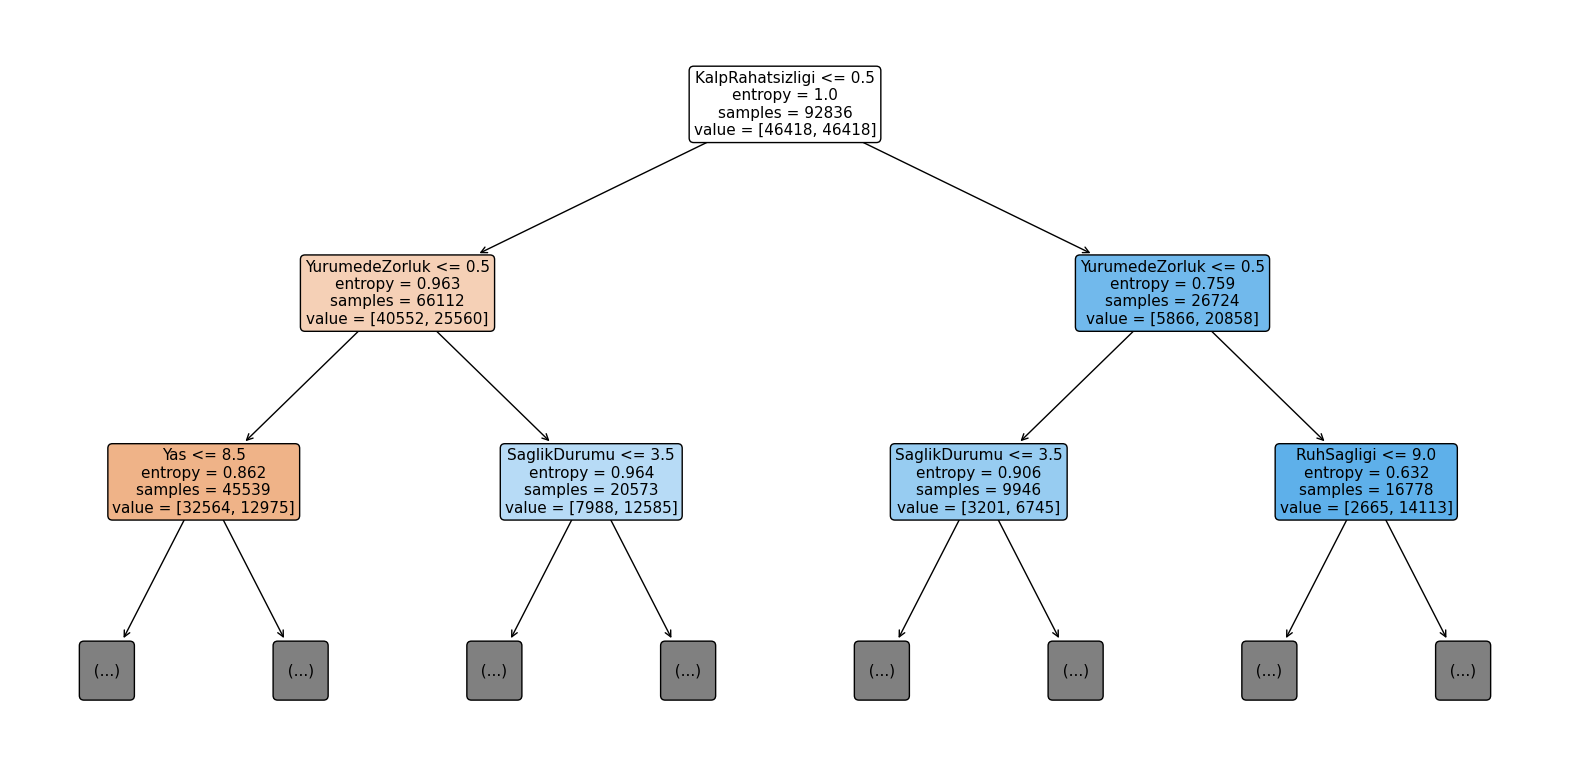

<Figure size 2000x1000 with 0 Axes>

In [49]:
plt.figure(figsize = (20, 10), dpi = 100)

from sklearn import tree
tree.plot_tree(dt, max_depth = 2, rounded = True, impurity = True, filled = True, feature_names = guncel_data.columns)
plt.figure(figsize = (20, 10), dpi = 100);

* **Destek Vektör Makinesi - Support Vector Machine**

In [50]:
clf = SVC(kernel = 'rbf', C = 1.0)
clf.fit(X_randomover, y_randomover)

SVC()

In [51]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.691%


In [53]:
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     19879
         1.0       0.14      0.76      0.24      1329

    accuracy                           0.69     21208
   macro avg       0.56      0.72      0.52     21208
weighted avg       0.92      0.69      0.77     21208



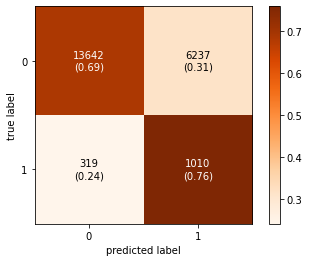

In [54]:
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm1, show_absolute = True, show_normed = True, colorbar = True, cmap = plt.cm.Oranges)
plt.show()

**K-En Yakın Komşu - K-Nearest Neighbors Classifier**

In [55]:
komsu_sayisi = 4
knn = KNeighborsClassifier(n_neighbors = komsu_sayisi)
knn.fit(X_randomover, y_randomover)

KNeighborsClassifier(n_neighbors=4)

In [56]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

Accuracy: 0.691%


In [57]:
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     19879
         1.0       0.14      0.76      0.24      1329

    accuracy                           0.69     21208
   macro avg       0.56      0.72      0.52     21208
weighted avg       0.92      0.69      0.77     21208



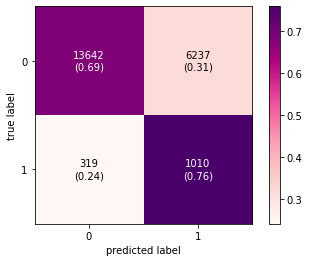

In [64]:
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm1, show_absolute = True, show_normed = True, colorbar = True, cmap = plt.cm.RdPu)
plt.show()

### Sonuç

* Model üzerinde Lojistik Regresyon, Karar Ağacı, Destek Vektör Makinesi (SVM) ve K-En Yakın Komşu (KNN) algoritmaları uygulandı.
* Random Oversampling yöntemi uygulanmadan önce accuracy (doğruluk) değeri daha yüksek olmasına rağmen, model "felç olma" durumunu tespit etmekte başarılı değildi. (f1 score = 0.01) 
* Random Oversampling yöntemi sonrasında "felç olma" durumuna ait f1 score 0.25'e kadar yükseldi.
* f1 score'lara baktığımızda "felç olma" durumunu yakalamada Lojistik Regresyon en başarılıyken SVM ve KNN algoritmaları onu takip etti. Karar Ağacı algoritması "felç olmama" durumunu iyi tahmin etti. (f1 score = 0.83)